In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# I Data preproccessing

In [2]:
data = pd.read_csv('criteo-uplift.csv.gz', nrows=1000000)
data.head()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,treatment,conversion,visit,exposure
0,1.991981,3.263641,9.241052,3.735871,3.506733,10.161281,2.981721,-0.166689,-0.584392,9.850093,-1.8609,4.157648,1,0,0,0
1,1.991981,3.263641,9.274430,3.735871,3.506733,10.161281,2.981721,-0.166689,-0.584392,9.850093,-1.8609,4.157648,1,0,0,0
2,1.991981,3.263641,9.226241,3.735871,3.506733,10.161281,2.981721,-0.166689,-0.584392,9.850093,-1.8609,4.157648,1,0,0,0
3,1.991981,3.263641,9.274572,3.735871,3.506733,10.161281,2.981721,-0.166689,-0.584392,9.850093,-1.8609,4.157648,1,0,0,0
4,1.991981,3.263641,9.332619,3.735871,3.506733,10.161281,2.981721,-0.166689,-0.584392,9.850093,-1.8609,4.157648,0,0,0,0


In [3]:
del data['conversion']
del data['exposure']

In [4]:
data.head()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,treatment,visit
0,1.991981,3.263641,9.241052,3.735871,3.506733,10.161281,2.981721,-0.166689,-0.584392,9.850093,-1.8609,4.157648,1,0
1,1.991981,3.263641,9.274430,3.735871,3.506733,10.161281,2.981721,-0.166689,-0.584392,9.850093,-1.8609,4.157648,1,0
2,1.991981,3.263641,9.226241,3.735871,3.506733,10.161281,2.981721,-0.166689,-0.584392,9.850093,-1.8609,4.157648,1,0
3,1.991981,3.263641,9.274572,3.735871,3.506733,10.161281,2.981721,-0.166689,-0.584392,9.850093,-1.8609,4.157648,1,0
4,1.991981,3.263641,9.332619,3.735871,3.506733,10.161281,2.981721,-0.166689,-0.584392,9.850093,-1.8609,4.157648,0,0


In [5]:
data.describe()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,treatment,visit
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,0.618684,3.265665,8.506814,3.656086,3.522713,10.201756,1.753294,-0.293824,-2.047741,10.669303,-2.093444,4.159106,0.846200,0.041221
std,1.534754,0.023107,0.358998,0.242420,0.109635,0.232314,1.676177,0.665597,5.466947,2.290951,1.384777,0.017106,0.360757,0.198801
min,-1.946282,3.263641,8.272483,1.435094,3.506733,10.161281,-8.432631,-4.724825,-32.912483,9.850093,-13.038210,4.157648,0.000000,0.000000
25%,-1.006203,3.263641,8.272483,3.735871,3.506733,10.161281,0.945163,-0.166689,-2.716012,9.850093,-1.860900,4.157648,1.000000,0.000000
50%,1.629968,3.263641,8.272483,3.735871,3.506733,10.161281,2.386066,-0.166689,1.107571,9.850093,-1.860900,4.157648,1.000000,0.000000
75%,1.991981,3.263641,8.755958,3.735871,3.506733,10.161281,2.981721,-0.166689,1.107571,9.850093,-1.860900,4.157648,1.000000,0.000000
max,1.991981,4.403077,9.337054,3.735871,7.367221,17.242807,2.981721,-0.166689,1.107571,29.543056,-1.860900,5.136556,1.000000,1.000000


In [6]:
data['visit'].value_counts(normalize=True)

0    0.958779
1    0.041221
Name: visit, dtype: float64

In [7]:
data['treatment'].value_counts(normalize=True)

1    0.8462
0    0.1538
Name: treatment, dtype: float64

In [8]:
data_1 = data[data['visit']==1]
data_2 = data[data['visit']==0].sample(n=sum(data['visit']==1))

In [9]:
data = pd.concat([data_1,data_2]).sample(frac=1)
data

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,treatment,visit
49479,-1.464579,3.263641,9.210464,3.735871,3.506733,10.161281,-1.747021,-0.166689,-5.168783,9.850093,-1.860900,4.157648,1,0
709718,1.840818,3.263641,9.120503,2.427324,3.506733,10.161281,-3.331276,-0.166689,-9.904933,9.850093,-1.860900,4.157648,1,0
740559,1.428006,3.263641,8.934902,2.667629,3.506733,10.161281,-4.558780,-0.166689,-15.499215,9.850093,-1.860900,4.157648,1,1
501428,-0.436224,3.263641,8.761601,3.735871,4.309886,10.161281,-3.700474,-0.166689,-18.252865,15.043962,-10.044826,4.157648,1,1
673379,-1.090929,3.263641,9.063226,3.735871,3.506733,10.161281,0.231920,-0.166689,-10.329661,9.850093,-1.860900,4.157648,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119195,1.991981,3.263641,8.483077,3.735871,5.113039,10.161281,2.981721,-0.166689,-17.045674,18.160441,-4.071999,4.600222,0,1
448390,1.991981,3.263641,8.272483,3.735871,3.506733,10.161281,2.981721,-0.166689,1.107571,9.850093,-1.860900,4.157648,1,0
171778,1.991981,3.263641,8.272483,3.735871,3.506733,10.161281,2.981721,-0.166689,1.107571,9.850093,-1.860900,4.157648,1,1
715543,1.991981,3.263641,8.442865,3.735871,3.506733,10.161281,2.981721,-0.166689,-14.071687,17.911972,-1.860900,4.157648,1,1


In [10]:
data['visit'].value_counts(normalize=True)

1    0.5
0    0.5
Name: visit, dtype: float64

In [11]:
data['treatment'].value_counts(normalize=True)

1    0.873305
0    0.126695
Name: treatment, dtype: float64

# II Statistical hypothesis testing
Whether treatment is independent of features

In [12]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import hamming_loss
from sklearn.model_selection import train_test_split
from scipy import stats
def c2st(X, y, clf=LogisticRegression(), loss=hamming_loss, bootstraps=300):
    """
    Perform Classifier Two Sample Test (C2ST).
    
    This test estimates if a target is predictable from features by comparing the loss of a classifier learning 
    the true target with the distribution of losses of classifiers learning a random target with the same average.
    
    The null hypothesis is that the target is independent of the features - therefore the loss a classifier learning 
    to predict the target should not be different from the one of a classifier learning independent, random noise.
    
    Input:
        - `X` : (n,m) matrix of features
        - `y` : (n,) vector of target - for now only supports binary target
        - `clf` : instance of sklearn compatible classifier (default: `LogisticRegression`)
        - `loss` : sklearn compatible loss function (default: `hamming_loss`)
        - `bootstraps` : number of resamples for generating the loss scores under the null hypothesis
    
    Return: (
        loss value of classifier predicting `y`, 
        loss values of bootstraped random targets, 
        p-value of the test
    )
    
    Usage:
    >>> emp_loss, random_losses, pvalue = c2st(X, y)
    
    Plotting H0 and target loss:
    >>>bins, _, __ = plt.hist(random_losses)
    >>>med = np.median(random_losses)
    >>>plt.plot((med,med),(0, max(bins)), 'b')
    >>>plt.plot((emp_loss,emp_loss),(0, max(bins)), 'r--')
    
    [1] Lopez-Paz, D., & Oquab, M. (2016). Revisiting classifier two-sample tests. arXiv preprint arXiv:1610.06545.
    """
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    y_pred = clf.fit(X_train, y_train).predict(X_test)
    emp_loss = loss(y_test, y_pred)
    bs_losses = []
    y_bar = np.mean(y)
    for b in range(bootstraps+1):
        y_random = np.random.binomial(1, y_bar, size=y.shape[0])
        X_train, X_test, y_train, y_test = train_test_split(X, y_random)
        y_pred_bs = clf.fit(X_train, y_train).predict(X_test)
        bs_losses += [loss(y_test, y_pred_bs)]
    pc = stats.percentileofscore(sorted(bs_losses), emp_loss) / 100.
    pvalue = pc if pc < y_bar else 1 - pc
    return emp_loss, np.array(bs_losses), pvalue

In [14]:
alpha = 0.05
emp_loss, random_losses, p_value = c2st(X = data.drop(['treatment', 'visit'], axis=1),y = data['treatment'], bootstraps=300)
if p_value > alpha:
    print('The null hypothesis is NOT denied, p-value = {}'.format(p_value))
else:
    print('The null hypothesis is denied, p-value = {}'.format(p_value))

The null hypothesis is NOT denied, p-value = 0.43355481727574746


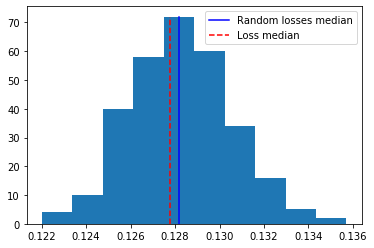

In [15]:
fig, ax = plt.subplots()
n, bins, patches = ax.hist(random_losses)
med = np.median(random_losses)
ax.plot((med,med),(0, max(n)), 'b', label='Random losses median')
ax.plot((emp_loss,emp_loss),(0, max(n)), 'r--', label='Loss median')
ax.legend()

# III Model training

## One model

In [14]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

In [87]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(['visit'], axis=1), data['visit'], train_size=0.75)

In [88]:
model = GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(
            subsample=0.666,
            max_features='sqrt',
            learning_rate=0.05
           ),
        iid=True, n_jobs=-1,
        param_grid={'n_estimators':[200, 250, 300, 350], 'max_depth':[5,6,7,8], 'min_samples_leaf':[6,7,8]},
        pre_dispatch='2*n_jobs', refit=True, scoring='recall', verbose=2)

In [89]:
model.fit(X_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:   50.2s
[Parallel(n_jobs=-1)]: Done 150 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  8.7min finished


GridSearchCV(cv=5, error_score='raise',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.05,
                                                  loss='deviance', max_depth=3,
                                                  max_features='sqrt',
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
                                                  presort='auto',
 

In [19]:
res = pd.DataFrame(model.cv_results_).sort_values('rank_test_score',ascending=True)
res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
44,13.875805,0.160538,0.101657,0.006992,8,8,200,"{'max_depth': 8, 'min_samples_leaf': 8, 'n_est...",0.834209,0.828052,0.829854,0.823547,0.828503,0.828833,0.003424,1
40,13.912365,0.110283,0.103099,0.007655,8,7,200,"{'max_depth': 8, 'min_samples_leaf': 7, 'n_est...",0.834209,0.827752,0.831506,0.823397,0.827151,0.828803,0.003731,2
45,16.866302,0.109859,0.119145,0.008038,8,8,250,"{'max_depth': 8, 'min_samples_leaf': 8, 'n_est...",0.834059,0.827151,0.829554,0.823998,0.828052,0.828563,0.003295,3
2,11.849249,0.249265,0.090605,0.006249,5,6,300,"{'max_depth': 5, 'min_samples_leaf': 6, 'n_est...",0.833609,0.828503,0.828503,0.822946,0.829103,0.828533,0.003385,4
12,9.901105,0.051811,0.071856,0.007650,6,6,200,"{'max_depth': 6, 'min_samples_leaf': 6, 'n_est...",0.833308,0.829103,0.828953,0.821445,0.829404,0.828443,0.003854,5
17,12.022187,0.105549,0.087479,0.007652,6,7,250,"{'max_depth': 6, 'min_samples_leaf': 7, 'n_est...",0.832257,0.827452,0.829404,0.823397,0.828953,0.828293,0.002900,6
14,14.093572,0.048804,0.103102,0.007650,6,6,300,"{'max_depth': 6, 'min_samples_leaf': 6, 'n_est...",0.832407,0.829704,0.829704,0.821445,0.827902,0.828233,0.003686,7
29,14.384129,0.183084,0.103098,0.007654,7,7,250,"{'max_depth': 7, 'min_samples_leaf': 7, 'n_est...",0.833458,0.826701,0.829854,0.822946,0.828052,0.828202,0.003472,8
38,20.663908,0.233045,0.140590,0.000002,8,6,300,"{'max_depth': 8, 'min_samples_leaf': 6, 'n_est...",0.832107,0.828653,0.831056,0.822045,0.826250,0.828022,0.003610,9
43,23.623227,0.134879,0.163516,0.007060,8,7,350,"{'max_depth': 8, 'min_samples_leaf': 7, 'n_est...",0.833008,0.825950,0.830755,0.821895,0.828353,0.827992,0.003854,10


In [90]:
model = GradientBoostingClassifier(
        subsample=0.666,
        max_features='sqrt',
        min_samples_leaf=8,
        n_estimators=200,
        max_depth=8,
        learning_rate=0.05)

In [91]:
model.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.05, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=8, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=0.666, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 <a list of 13 Text xticklabel objects>)

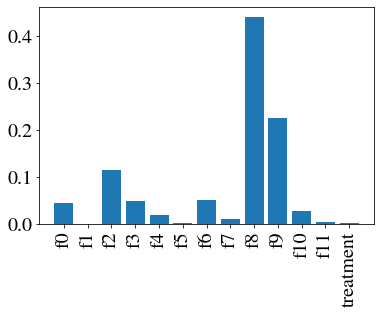

In [106]:
plt.bar(data.drop('visit', axis=1).columns, model.feature_importances_)
plt.xticks(rotation='vertical')

In [93]:
y_pred_train = model.predict(X_train)

In [94]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88     30863
           1       0.90      0.84      0.87     30968

    accuracy                           0.88     61831
   macro avg       0.88      0.88      0.88     61831
weighted avg       0.88      0.88      0.88     61831



In [95]:
y_pred_test = model.predict(X_test)

In [96]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86     10358
           1       0.88      0.83      0.85     10253

    accuracy                           0.86     20611
   macro avg       0.86      0.86      0.86     20611
weighted avg       0.86      0.86      0.86     20611



In [97]:
X_uplift_1 = data.copy()
X_uplift_1['treatment'] = 1
X_uplift_1

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,treatment,visit
49479,-1.464579,3.263641,9.210464,3.735871,3.506733,10.161281,-1.747021,-0.166689,-5.168783,9.850093,-1.860900,4.157648,1,0
709718,1.840818,3.263641,9.120503,2.427324,3.506733,10.161281,-3.331276,-0.166689,-9.904933,9.850093,-1.860900,4.157648,1,0
740559,1.428006,3.263641,8.934902,2.667629,3.506733,10.161281,-4.558780,-0.166689,-15.499215,9.850093,-1.860900,4.157648,1,1
501428,-0.436224,3.263641,8.761601,3.735871,4.309886,10.161281,-3.700474,-0.166689,-18.252865,15.043962,-10.044826,4.157648,1,1
673379,-1.090929,3.263641,9.063226,3.735871,3.506733,10.161281,0.231920,-0.166689,-10.329661,9.850093,-1.860900,4.157648,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119195,1.991981,3.263641,8.483077,3.735871,5.113039,10.161281,2.981721,-0.166689,-17.045674,18.160441,-4.071999,4.600222,1,1
448390,1.991981,3.263641,8.272483,3.735871,3.506733,10.161281,2.981721,-0.166689,1.107571,9.850093,-1.860900,4.157648,1,0
171778,1.991981,3.263641,8.272483,3.735871,3.506733,10.161281,2.981721,-0.166689,1.107571,9.850093,-1.860900,4.157648,1,1
715543,1.991981,3.263641,8.442865,3.735871,3.506733,10.161281,2.981721,-0.166689,-14.071687,17.911972,-1.860900,4.157648,1,1


In [98]:
X_uplift_0 = data.copy()
X_uplift_0['treatment'] = 0
X_uplift_0

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,treatment,visit
49479,-1.464579,3.263641,9.210464,3.735871,3.506733,10.161281,-1.747021,-0.166689,-5.168783,9.850093,-1.860900,4.157648,0,0
709718,1.840818,3.263641,9.120503,2.427324,3.506733,10.161281,-3.331276,-0.166689,-9.904933,9.850093,-1.860900,4.157648,0,0
740559,1.428006,3.263641,8.934902,2.667629,3.506733,10.161281,-4.558780,-0.166689,-15.499215,9.850093,-1.860900,4.157648,0,1
501428,-0.436224,3.263641,8.761601,3.735871,4.309886,10.161281,-3.700474,-0.166689,-18.252865,15.043962,-10.044826,4.157648,0,1
673379,-1.090929,3.263641,9.063226,3.735871,3.506733,10.161281,0.231920,-0.166689,-10.329661,9.850093,-1.860900,4.157648,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119195,1.991981,3.263641,8.483077,3.735871,5.113039,10.161281,2.981721,-0.166689,-17.045674,18.160441,-4.071999,4.600222,0,1
448390,1.991981,3.263641,8.272483,3.735871,3.506733,10.161281,2.981721,-0.166689,1.107571,9.850093,-1.860900,4.157648,0,0
171778,1.991981,3.263641,8.272483,3.735871,3.506733,10.161281,2.981721,-0.166689,1.107571,9.850093,-1.860900,4.157648,0,1
715543,1.991981,3.263641,8.442865,3.735871,3.506733,10.161281,2.981721,-0.166689,-14.071687,17.911972,-1.860900,4.157648,0,1


In [101]:
y_uplift_1 = model.predict_proba(X_uplift_1.drop('visit', axis=1))[:, 1]
y_uplift_1

array([0.16935488, 0.68040726, 0.84305673, ..., 0.22673139, 0.92976567,
       0.97130062])

In [103]:
y_uplift_0 = model.predict_proba(X_uplift_0.drop('visit', axis=1))[:, 1]
y_uplift_0

array([0.11679418, 0.22111356, 0.73568668, ..., 0.27027692, 0.90987936,
       0.93655914])

In [104]:
uplift = y_uplift_1 - y_uplift_0
uplift

array([ 0.0525607 ,  0.4592937 ,  0.10737006, ..., -0.04354553,
        0.0198863 ,  0.03474148])

In [374]:
res_one_model = data.copy()
res_one_model['uplift'] = uplift
res_one_model.sort_values(by='uplift', ascending=False)

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,treatment,visit,uplift
77084,1.727458,3.263641,9.165575,2.359903,3.506733,10.161281,-3.805451,-0.166689,-5.608441,9.850093,-1.860900,4.157648,1,1,0.571967
948811,1.970080,3.263641,9.192947,2.252863,3.506733,10.161281,-4.775922,-0.166689,-2.716012,9.850093,-1.860900,4.157648,1,1,0.565643
238763,1.840689,3.263641,8.923434,2.241373,3.506733,10.161281,-3.768814,-0.166689,-5.608441,9.850093,-1.860900,4.157648,1,1,0.531982
310736,1.663802,3.263641,8.929346,2.311603,3.506733,10.161281,-3.827003,-0.166689,-3.476821,9.850093,-1.860900,4.157648,0,0,0.518512
246928,1.881742,3.263641,9.040219,2.316167,3.506733,10.161281,-4.413119,-0.166689,-1.784858,9.850093,-1.860900,4.157648,0,0,0.513951
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4102,-1.764943,3.263641,8.613049,3.735871,4.013466,10.161281,-1.382015,-0.166689,-18.171440,19.662583,-12.684144,4.157648,1,0,-0.117800
629958,-1.675907,3.263641,8.295660,3.735871,4.013466,10.161281,2.386066,-0.166689,-14.587515,10.932329,-12.610251,4.157648,1,0,-0.124789
294239,-0.480888,3.263641,8.287549,3.735871,4.013466,10.161281,-2.957789,-0.166689,-12.567604,10.932329,-12.730616,4.157648,1,0,-0.126445
377525,-0.013025,3.263641,8.844143,2.730238,5.259742,10.161281,-5.958484,-0.166689,-20.070587,10.932329,-8.315335,4.157648,1,0,-0.204440


## Two models

In [298]:
model_data_1 = data[data['treatment'] == 1].copy()
model_data_1

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,treatment,visit
49479,-1.464579,3.263641,9.210464,3.735871,3.506733,10.161281,-1.747021,-0.166689,-5.168783,9.850093,-1.860900,4.157648,1,0
709718,1.840818,3.263641,9.120503,2.427324,3.506733,10.161281,-3.331276,-0.166689,-9.904933,9.850093,-1.860900,4.157648,1,0
740559,1.428006,3.263641,8.934902,2.667629,3.506733,10.161281,-4.558780,-0.166689,-15.499215,9.850093,-1.860900,4.157648,1,1
501428,-0.436224,3.263641,8.761601,3.735871,4.309886,10.161281,-3.700474,-0.166689,-18.252865,15.043962,-10.044826,4.157648,1,1
673379,-1.090929,3.263641,9.063226,3.735871,3.506733,10.161281,0.231920,-0.166689,-10.329661,9.850093,-1.860900,4.157648,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71462,1.991981,3.263641,8.296401,3.735871,3.506733,10.161281,2.981721,-0.166689,-22.230798,19.920048,-1.860900,4.157648,1,1
771867,1.991981,3.263641,8.272483,3.735871,3.506733,10.161281,2.981721,-0.166689,1.107571,9.850093,-1.860900,4.157648,1,0
448390,1.991981,3.263641,8.272483,3.735871,3.506733,10.161281,2.981721,-0.166689,1.107571,9.850093,-1.860900,4.157648,1,0
171778,1.991981,3.263641,8.272483,3.735871,3.506733,10.161281,2.981721,-0.166689,1.107571,9.850093,-1.860900,4.157648,1,1


In [299]:
model_data_0 = data[data['treatment'] == 0].copy()
model_data_0

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,treatment,visit
538225,1.991981,3.263641,8.272483,3.735871,3.506733,10.161281,2.981721,-0.166689,1.107571,9.850093,-1.860900,4.157648,0,0
29658,0.012170,3.263641,8.272483,3.207613,3.506733,10.161281,0.772132,-0.166689,1.107571,9.850093,-1.860900,4.157648,0,0
953562,-0.625776,3.263641,8.272483,3.735871,3.506733,10.161281,1.963442,-0.166689,1.107571,9.850093,-1.860900,4.157648,0,0
748343,0.806050,3.263641,8.477373,3.162731,3.506733,10.161281,0.772132,-0.166689,-21.753847,23.188256,-1.860900,4.157648,0,1
182371,-1.562630,3.263641,8.762235,3.735871,3.803153,10.161281,1.635629,-0.166689,-14.538709,16.482609,-10.396672,4.157648,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
778391,-0.097700,3.263641,8.331402,3.386711,3.506733,10.161281,1.141329,-0.166689,-21.990910,20.822512,-1.860900,4.157648,0,1
765249,-1.268260,3.263641,8.807463,3.735871,3.506733,10.161281,2.386066,-0.166689,-11.067974,15.043962,-1.860900,4.157648,0,1
394217,-1.680161,3.263641,8.272483,3.735871,3.506733,10.161281,2.386066,-0.166689,1.107571,9.850093,-1.860900,4.157648,0,0
119195,1.991981,3.263641,8.483077,3.735871,5.113039,10.161281,2.981721,-0.166689,-17.045674,18.160441,-4.071999,4.600222,0,1


In [300]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(model_data_1.drop(['visit'], axis=1), model_data_1['visit'], train_size=0.75)
X_train_0, X_test_0, y_train_0, y_test_0 = train_test_split(model_data_0.drop(['visit'], axis=1), model_data_0['visit'], train_size=0.75)

In [301]:
model_1 = GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(
            subsample=0.666,
            max_features='sqrt',
            learning_rate=0.05
           ),
        iid=True, n_jobs=-1,
        param_grid={'n_estimators':[200, 250, 300], 'max_depth':[5,6,7,8], 'min_samples_leaf':[4,5,7,8,10]},
        pre_dispatch='2*n_jobs', refit=True, scoring='recall', verbose=2)

In [302]:
model_0 = GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(
            subsample=0.666,
            max_features='sqrt',
            learning_rate=0.05
           ),
        iid=True, n_jobs=-1,
        param_grid={'n_estimators':[150, 200, 250], 'max_depth':[4,5,6,7], 'min_samples_leaf':[4,5,7,8,10]},
        pre_dispatch='2*n_jobs', refit=True, scoring='recall', verbose=2)

In [303]:
model_1.fit(X_train_1,y_train_1)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:   37.0s
[Parallel(n_jobs=-1)]: Done 150 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  7.8min finished


GridSearchCV(cv=5, error_score='raise',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.05,
                                                  loss='deviance', max_depth=3,
                                                  max_features='sqrt',
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
                                                  presort='auto',
 

In [304]:
res_1 = pd.DataFrame(model_1.cv_results_).sort_values('rank_test_score',ascending=True)
res_1

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
18,6.645319,0.044843,0.059360,6.249738e-03,6,5,200,"{'max_depth': 6, 'min_samples_leaf': 5, 'n_est...",0.841253,0.845032,0.825203,0.838344,0.835824,0.837131,0.006707,1
5,8.225989,0.091506,0.068234,8.692688e-03,5,5,300,"{'max_depth': 5, 'min_samples_leaf': 5, 'n_est...",0.841433,0.845932,0.824482,0.836364,0.835464,0.836735,0.007191,2
21,6.597562,0.070033,0.059361,6.245948e-03,6,7,200,"{'max_depth': 6, 'min_samples_leaf': 7, 'n_est...",0.841973,0.847012,0.823942,0.835104,0.835104,0.836627,0.007771,3
29,9.405614,0.112488,0.078105,1.903769e-06,6,10,300,"{'max_depth': 6, 'min_samples_leaf': 10, 'n_es...",0.839993,0.846832,0.823402,0.836364,0.836184,0.836555,0.007624,4
11,8.198671,0.105046,0.067164,9.357406e-03,5,8,300,"{'max_depth': 5, 'min_samples_leaf': 8, 'n_est...",0.840893,0.846112,0.825743,0.834563,0.835464,0.836555,0.006815,5
26,9.711987,0.121003,0.078106,2.623038e-06,6,8,300,"{'max_depth': 6, 'min_samples_leaf': 8, 'n_est...",0.842333,0.843952,0.824662,0.834923,0.836364,0.836447,0.006814,6
14,8.010625,0.154135,0.071856,7.651775e-03,5,10,300,"{'max_depth': 5, 'min_samples_leaf': 10, 'n_es...",0.839813,0.845932,0.823942,0.835644,0.836364,0.836339,0.007187,7
9,5.548705,0.078148,0.053385,6.570649e-03,5,8,200,"{'max_depth': 5, 'min_samples_leaf': 8, 'n_est...",0.842333,0.845572,0.822862,0.835464,0.835464,0.836339,0.007802,8
22,8.156761,0.033329,0.068341,5.770908e-03,6,7,250,"{'max_depth': 6, 'min_samples_leaf': 7, 'n_est...",0.838733,0.847732,0.822862,0.835644,0.836544,0.836303,0.007971,9
27,6.552468,0.073019,0.053113,7.650802e-03,6,10,200,"{'max_depth': 6, 'min_samples_leaf': 10, 'n_es...",0.842693,0.845212,0.823582,0.834563,0.835464,0.836303,0.007560,10


In [115]:
model_0.fit(X_train_0,y_train_0)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 150 tasks      | elapsed:   14.4s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   34.0s finished


GridSearchCV(cv=5, error_score='raise',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.05,
                                                  loss='deviance', max_depth=3,
                                                  max_features='sqrt',
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
                                                  presort='auto',
 

In [116]:
res_0 = pd.DataFrame(model_0.cv_results_).sort_values('rank_test_score',ascending=True)
res_0

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
21,0.450286,1.107750e-02,0.006960,5.000018e-03,5,7,150,"{'max_depth': 5, 'min_samples_leaf': 7, 'n_est...",0.780165,0.773554,0.785124,0.765289,0.720661,0.764964,0.023124,1
24,0.439246,6.780627e-03,0.013893,3.455663e-03,5,8,150,"{'max_depth': 5, 'min_samples_leaf': 8, 'n_est...",0.775207,0.780165,0.778512,0.766942,0.723967,0.764964,0.020994,2
28,0.565983,8.979148e-03,0.012497,6.248403e-03,5,10,200,"{'max_depth': 5, 'min_samples_leaf': 10, 'n_es...",0.775207,0.783471,0.781818,0.765289,0.717355,0.764634,0.024482,3
7,0.521140,3.001065e-02,0.002593,3.191567e-03,4,7,200,"{'max_depth': 4, 'min_samples_leaf': 7, 'n_est...",0.773554,0.781818,0.783471,0.766942,0.717355,0.764634,0.024371,4
14,0.606312,7.604043e-03,0.009292,5.880634e-03,4,10,250,"{'max_depth': 4, 'min_samples_leaf': 10, 'n_es...",0.776860,0.780165,0.780165,0.765289,0.720661,0.764634,0.022651,5
3,0.374507,1.425334e-02,0.010370,6.621873e-03,4,5,150,"{'max_depth': 4, 'min_samples_leaf': 5, 'n_est...",0.770248,0.780165,0.785124,0.766942,0.720661,0.764633,0.022939,6
18,0.477080,1.630581e-02,0.006813,7.591587e-03,5,5,150,"{'max_depth': 5, 'min_samples_leaf': 5, 'n_est...",0.770248,0.780165,0.780165,0.766942,0.725620,0.764633,0.020204,7
6,0.391600,5.687051e-03,0.005784,3.985888e-04,4,7,150,"{'max_depth': 4, 'min_samples_leaf': 7, 'n_est...",0.771901,0.785124,0.780165,0.765289,0.719008,0.764303,0.023643,8
27,0.452378,1.569116e-02,0.008841,6.028756e-03,5,10,150,"{'max_depth': 5, 'min_samples_leaf': 10, 'n_es...",0.775207,0.781818,0.776860,0.765289,0.722314,0.764303,0.021665,9
2,0.638687,2.225250e-02,0.004569,6.193119e-03,4,4,250,"{'max_depth': 4, 'min_samples_leaf': 4, 'n_est...",0.775207,0.778512,0.776860,0.765289,0.723967,0.763972,0.020520,10


In [391]:
model_1 = GradientBoostingClassifier(
        subsample=0.666,
        max_features='sqrt',
        min_samples_leaf=5,
        n_estimators=200,
        max_depth=6,
        learning_rate=0.05)

In [392]:
model_0 = GradientBoostingClassifier(
        subsample=0.666,
        max_features='sqrt',
        min_samples_leaf=7,
        n_estimators=150,
        max_depth=5,
        learning_rate=0.05)

In [393]:
model_1.fit(X_train_1, y_train_1)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.05, loss='deviance', max_depth=6,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=5, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=0.666, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [394]:
model_0.fit(X_train_0, y_train_0)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.05, loss='deviance', max_depth=5,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=7, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=150,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=0.666, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [309]:
y_pred_train_1 = model.predict(X_train_1)

In [310]:
print(classification_report(y_train_1, y_pred_train_1))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87     26220
           1       0.90      0.85      0.87     27777

    accuracy                           0.87     53997
   macro avg       0.87      0.87      0.87     53997
weighted avg       0.87      0.87      0.87     53997



In [311]:
y_pred_test_1 = model.predict(X_test_1)

In [312]:
print(classification_report(y_test_1, y_pred_test_1))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      8577
           1       0.90      0.84      0.87      9423

    accuracy                           0.87     18000
   macro avg       0.87      0.87      0.87     18000
weighted avg       0.87      0.87      0.87     18000



In [313]:
y_pred_train_0 = model.predict(X_train_0)

In [314]:
print(classification_report(y_train_0, y_pred_train_0))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90      4788
           1       0.89      0.78      0.83      3045

    accuracy                           0.88      7833
   macro avg       0.88      0.86      0.87      7833
weighted avg       0.88      0.88      0.87      7833



In [315]:
y_pred_test_0 = model.predict(X_test_0)

In [316]:
print(classification_report(y_test_0, y_pred_test_0))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1636
           1       0.89      0.79      0.84       976

    accuracy                           0.88      2612
   macro avg       0.89      0.86      0.87      2612
weighted avg       0.89      0.88      0.88      2612



In [398]:
uplift_two_models = model_1.predict_proba(data.drop('visit', axis=1))[:, 1] - model_0.predict_proba(data.drop('visit', axis=1))[:, 1]

In [401]:
res_two_models = data.copy()
res_two_models['uplift'] = uplift_two_models
res_two_models.sort_values(by='uplift', ascending=False)

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,treatment,visit,uplift
607038,1.990113,3.263641,9.174609,1.862468,3.506733,12.260127,-6.948073,-3.395180,-6.369250,9.850093,-1.860900,4.157648,1,1,0.884254
85081,1.957525,3.417861,9.224621,2.078164,3.803153,12.260127,-5.851028,-2.160447,-13.607555,9.850093,-12.242584,4.157648,1,1,0.844088
251125,1.690130,3.417861,9.322158,2.085612,3.506733,12.681173,-5.727283,-2.017438,-0.584392,9.850093,-1.860900,4.157648,1,1,0.798007
384907,1.695906,3.263641,9.191631,2.226573,3.506733,10.161281,-5.709572,-0.166689,-7.012504,9.850093,-1.860900,4.157648,1,1,0.791968
721488,1.945020,3.263641,9.148041,2.095774,4.422580,10.840586,-5.816460,-4.655604,-14.180080,9.850093,-11.709284,4.157648,0,1,0.778646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762884,0.774412,3.527281,8.601309,2.188608,5.292239,11.322561,-2.983339,-2.635829,-23.319036,25.474160,-5.314803,4.713131,1,0,-0.445573
693110,0.307590,3.263641,8.862609,2.679355,3.506733,10.161281,-1.091396,-0.166689,-13.607555,19.262375,-1.860900,4.157648,1,0,-0.448216
934375,1.991981,3.263641,8.279424,3.735871,3.803153,10.161281,2.981721,-0.166689,-17.099173,12.295784,-13.020661,4.157648,0,1,-0.465774
423827,-1.942262,3.263641,8.374197,3.735871,3.506733,10.161281,2.386066,-0.166689,-13.960403,16.591568,-1.860900,4.157648,1,0,-0.493074


## Trasformrmed outcome

In [583]:
model_data_t = data.copy()
p = len(data[data['treatment'] == 1]) / len(data)
model_data_t

0.8733048688775139

In [571]:
model_data_t['Y*'] = model_data_t['visit'] * ((model_data_t['treatment'] - p) / (p * (1 - p)))
model_data_t

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,treatment,visit,Y*
49479,-1.464579,3.263641,9.210464,3.735871,3.506733,10.161281,-1.747021,-0.166689,-5.168783,9.850093,-1.860900,4.157648,1,0,0.000000
709718,1.840818,3.263641,9.120503,2.427324,3.506733,10.161281,-3.331276,-0.166689,-9.904933,9.850093,-1.860900,4.157648,1,0,0.000000
740559,1.428006,3.263641,8.934902,2.667629,3.506733,10.161281,-4.558780,-0.166689,-15.499215,9.850093,-1.860900,4.157648,1,1,1.145075
501428,-0.436224,3.263641,8.761601,3.735871,4.309886,10.161281,-3.700474,-0.166689,-18.252865,15.043962,-10.044826,4.157648,1,1,1.145075
673379,-1.090929,3.263641,9.063226,3.735871,3.506733,10.161281,0.231920,-0.166689,-10.329661,9.850093,-1.860900,4.157648,1,1,1.145075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119195,1.991981,3.263641,8.483077,3.735871,5.113039,10.161281,2.981721,-0.166689,-17.045674,18.160441,-4.071999,4.600222,0,1,-7.892963
448390,1.991981,3.263641,8.272483,3.735871,3.506733,10.161281,2.981721,-0.166689,1.107571,9.850093,-1.860900,4.157648,1,0,0.000000
171778,1.991981,3.263641,8.272483,3.735871,3.506733,10.161281,2.981721,-0.166689,1.107571,9.850093,-1.860900,4.157648,1,1,1.145075
715543,1.991981,3.263641,8.442865,3.735871,3.506733,10.161281,2.981721,-0.166689,-14.071687,17.911972,-1.860900,4.157648,1,1,1.145075


In [526]:
from sklearn.ensemble import GradientBoostingRegressor

In [572]:
X_train, X_test, y_train, y_test = train_test_split(model_data_t.drop(['visit','Y*'], axis=1), model_data_t['Y*'], train_size=0.75)

In [573]:
model_t = GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingRegressor(
            loss='ls', # estimating E()
            subsample=0.666,
            max_features='sqrt',
            learning_rate=0.01
           ),
        iid=True, n_jobs=-1,
        param_grid={'n_estimators':[400, 450, 500], 'max_depth':[7,8,9,10], 'min_samples_leaf':[6,7,8,9]},
        pre_dispatch='2*n_jobs', refit=True, scoring='r2', verbose=2)

In [574]:
model_t.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 150 tasks      | elapsed: 10.6min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed: 19.1min finished


GridSearchCV(cv=5, error_score='raise',
             estimator=GradientBoostingRegressor(alpha=0.9,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.01,
                                                 loss='ls', max_depth=3,
                                                 max_features='sqrt',
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_no_change=None,
                         

In [575]:
res_t = pd.DataFrame(model_t.cv_results_).sort_values('rank_test_score',ascending=True)
res_t

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
5,21.877938,0.229206,0.191633,0.006081,7,7,500,"{'max_depth': 7, 'min_samples_leaf': 7, 'n_est...",0.733254,0.742682,0.782087,0.731077,0.747610,0.747342,0.018396,1
23,30.395039,0.418651,0.242232,0.025691,8,9,500,"{'max_depth': 8, 'min_samples_leaf': 9, 'n_est...",0.733211,0.742262,0.782024,0.730503,0.747065,0.747013,0.018501,2
17,28.855200,0.345364,0.233791,0.001746,8,7,500,"{'max_depth': 8, 'min_samples_leaf': 7, 'n_est...",0.734047,0.741474,0.782604,0.730613,0.745646,0.746877,0.018635,3
22,27.515447,0.782453,0.219207,0.010880,8,9,450,"{'max_depth': 8, 'min_samples_leaf': 9, 'n_est...",0.732666,0.742143,0.782534,0.730681,0.746178,0.746840,0.018754,4
11,22.021743,0.389572,0.195912,0.001567,7,9,500,"{'max_depth': 7, 'min_samples_leaf': 9, 'n_est...",0.733330,0.742064,0.781507,0.730347,0.746428,0.746735,0.018326,5
8,22.400016,0.401293,0.203514,0.008189,7,8,500,"{'max_depth': 7, 'min_samples_leaf': 8, 'n_est...",0.733291,0.742309,0.781134,0.731045,0.745893,0.746734,0.018058,6
2,22.010937,0.261186,0.196827,0.007652,7,6,500,"{'max_depth': 7, 'min_samples_leaf': 6, 'n_est...",0.732024,0.742545,0.782089,0.729881,0.746942,0.746696,0.018804,7
20,30.427000,0.497053,0.303451,0.067706,8,8,500,"{'max_depth': 8, 'min_samples_leaf': 8, 'n_est...",0.732447,0.741820,0.782692,0.730588,0.745886,0.746686,0.018882,8
10,20.495469,0.248439,0.183893,0.006018,7,9,450,"{'max_depth': 7, 'min_samples_leaf': 9, 'n_est...",0.732546,0.742610,0.780973,0.730315,0.746842,0.746657,0.018222,9
7,20.042752,0.257042,0.181207,0.012498,7,8,450,"{'max_depth': 7, 'min_samples_leaf': 8, 'n_est...",0.732532,0.741928,0.780462,0.730813,0.746519,0.746451,0.017975,10


In [576]:
model_t = GradientBoostingRegressor(
        loss='ls',
        subsample=0.666,
        max_features='sqrt',
        min_samples_leaf=7,
        n_estimators=500,
        max_depth=7,
        learning_rate=0.05)

In [577]:
model_t.fit(X_train, y_train)
model_t.score(X_train, y_train)

0.8028180122990096

In [578]:
model_t.fit(X_test, y_test)
model_t.score(X_test, y_test)

0.8278468267948194

In [579]:
uplift_t = model_t.predict(model_data_t.drop(['visit', 'Y*'], axis=1))
uplift_t

array([ 0.48499674,  0.73456988,  0.88196347, ...,  0.26763581,
        1.03719684, -6.11398179])

In [580]:
model_data_t['uplift'] = uplift_t
model_data_t.sort_values(by='uplift', ascending=False)

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,treatment,visit,Y*,uplift
491628,1.813556,3.263641,8.704443,2.920382,3.803153,10.161281,-3.195251,-0.166689,-24.689608,15.228113,-12.899587,4.157648,1,1,1.145075,1.958370
741886,1.991981,3.263641,8.817942,3.735871,3.803153,10.161281,2.981721,-0.166689,-16.375410,13.550280,-12.886573,4.157648,1,1,1.145075,1.813980
700549,1.950784,3.263641,8.356494,3.386711,3.803153,10.161281,-0.728742,-0.166689,-14.285729,16.126198,-12.871279,4.157648,1,1,1.145075,1.771543
482826,1.991981,3.263641,8.520505,3.735871,3.803153,10.161281,2.981721,-0.166689,-15.216883,15.995971,-12.886633,4.157648,1,1,1.145075,1.753998
485282,1.944482,3.263641,8.275842,2.479967,4.013466,10.161281,-5.934898,-0.166689,-18.088395,14.400272,-10.336775,4.157648,1,1,1.145075,1.750223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
471271,-1.133290,3.263641,8.519223,3.735871,3.506733,10.840586,-1.343855,-4.467790,-13.787707,12.782422,-1.860900,4.157648,0,1,-7.892963,-8.878215
336689,-0.848035,3.263641,8.377551,3.735871,3.506733,10.161281,-0.162178,-0.166689,-14.635757,15.714751,-1.860900,4.157648,0,1,-7.892963,-8.892731
645423,0.647133,3.263641,8.644813,3.122582,3.506733,10.161281,-2.086539,-0.166689,-16.650646,17.778488,-1.860900,4.157648,0,0,-0.000000,-8.920618
306235,1.740730,3.263641,8.527531,2.943484,3.506733,11.322561,-2.970620,-3.648985,-14.635757,13.550280,-1.860900,4.157648,0,1,-7.892963,-9.277259


# IV Model evaluation

In [456]:
from pylift.eval import UpliftEval
from pylift.eval import get_scores

In [372]:
res_one_model.sort_values(by='uplift', ascending=False).head()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,treatment,visit,uplift
77084,1.727458,3.263641,9.165575,2.359903,3.506733,10.161281,-3.805451,-0.166689,-5.608441,9.850093,-1.8609,4.157648,1,1,0.571967
948811,1.970080,3.263641,9.192947,2.252863,3.506733,10.161281,-4.775922,-0.166689,-2.716012,9.850093,-1.8609,4.157648,1,1,0.565643
238763,1.840689,3.263641,8.923434,2.241373,3.506733,10.161281,-3.768814,-0.166689,-5.608441,9.850093,-1.8609,4.157648,1,1,0.531982
310736,1.663802,3.263641,8.929346,2.311603,3.506733,10.161281,-3.827003,-0.166689,-3.476821,9.850093,-1.8609,4.157648,0,0,0.518512
246928,1.881742,3.263641,9.040219,2.316167,3.506733,10.161281,-4.413119,-0.166689,-1.784858,9.850093,-1.8609,4.157648,0,0,0.513951


In [402]:
res_two_models.sort_values(by='uplift', ascending=False).head()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,treatment,visit,uplift
607038,1.990113,3.263641,9.174609,1.862468,3.506733,12.260127,-6.948073,-3.395180,-6.369250,9.850093,-1.860900,4.157648,1,1,0.884254
85081,1.957525,3.417861,9.224621,2.078164,3.803153,12.260127,-5.851028,-2.160447,-13.607555,9.850093,-12.242584,4.157648,1,1,0.844088
251125,1.690130,3.417861,9.322158,2.085612,3.506733,12.681173,-5.727283,-2.017438,-0.584392,9.850093,-1.860900,4.157648,1,1,0.798007
384907,1.695906,3.263641,9.191631,2.226573,3.506733,10.161281,-5.709572,-0.166689,-7.012504,9.850093,-1.860900,4.157648,1,1,0.791968
721488,1.945020,3.263641,9.148041,2.095774,4.422580,10.840586,-5.816460,-4.655604,-14.180080,9.850093,-11.709284,4.157648,0,1,0.778646


In [403]:
model_data_t.sort_values(by='uplift', ascending=False).head()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,treatment,visit,Y*,uplift
514297,1.991981,3.263641,8.591160,3.735871,3.506733,10.161281,2.981721,-0.166689,-18.921958,22.661644,-1.860900,4.157648,1,1,1.145075,1.687156
977926,1.991981,3.263641,8.386759,3.735871,3.506733,10.161281,2.981721,-0.166689,-18.835200,22.583626,-1.860900,4.157648,1,1,1.145075,1.582425
729457,-1.740068,3.263641,8.555882,3.735871,4.979751,10.161281,0.123050,-0.166689,-18.025008,18.039097,-6.162126,4.407514,1,1,1.145075,1.579164
325758,-0.026562,3.263641,8.354010,3.471742,3.506733,10.161281,1.963442,-0.166689,-19.702753,22.661644,-1.860900,4.157648,1,1,1.145075,1.561691
440749,1.991981,3.263641,8.375132,3.735871,3.506733,10.161281,2.981721,-0.166689,-18.817630,22.594912,-1.860900,4.157648,1,1,1.145075,1.543233


In [581]:
upev_1 = UpliftEval(res_one_model['treatment'], res_one_model['visit'], res_one_model['uplift'], n_bins=20)
upev_2 = UpliftEval(res_two_models['treatment'], res_two_models['visit'], res_two_models['uplift'], n_bins=20)
upev_3 = UpliftEval(model_data_t['treatment'], model_data_t['visit'], model_data_t['uplift'], n_bins=20)

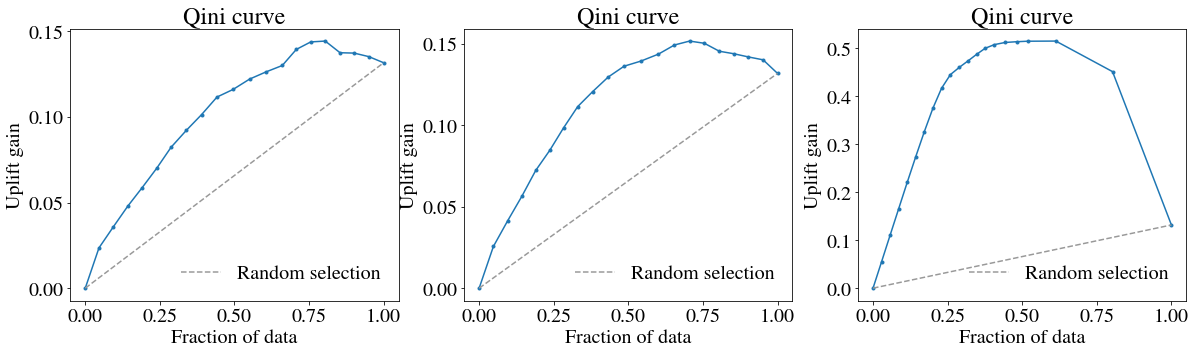

In [582]:
import numpy as np
fig = plt.figure(figsize=(20,5))

ax1 = fig.add_subplot(131)
upev_1.plot(plot_type='qini', ax=ax1)

ax2 = fig.add_subplot(132)
upev_2.plot(plot_type='qini', ax=ax2)

ax3 = fig.add_subplot(133)
upev_3.plot(plot_type='qini', ax=ax3)